In [ ]:
import pandas as pd
import shap
import numpy as np
import matplotlib.pyplot as plt

with open("her2neg.txt", "r") as f:
    filter_values = set(line.strip() for line in f) 

df = pd.read_csv("shap_values_LCO_prism_cell-lines_with_gene_names.csv")

# df = df[df.iloc[:, 0].isin(filter_values)]


cell_lines = df["Cell Line"].values  


shap_values = df.iloc[:, 1:-1].values  


base_values = df["Base Value"].values  


feature_names = df.columns[1:-1].tolist() 


explainer = shap.Explanation(shap_values, base_values=base_values, feature_names=feature_names)


shap.summary_plot(shap_values, features=df.iloc[:, 1:-1], feature_names=feature_names)


/Users/kian/anaconda3/lib/python3.10/site-packages/shap/plots/_utils.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color == "shap_red":
/Users/kian/anaconda3/lib/python3.10/site-packages/shap/plots/_utils.py:12: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color == "shap_blue":
/Users/kian/anaconda3/lib/python3.10/site-packages/matplotlib/_api/__init__.py:127: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if val not in values:


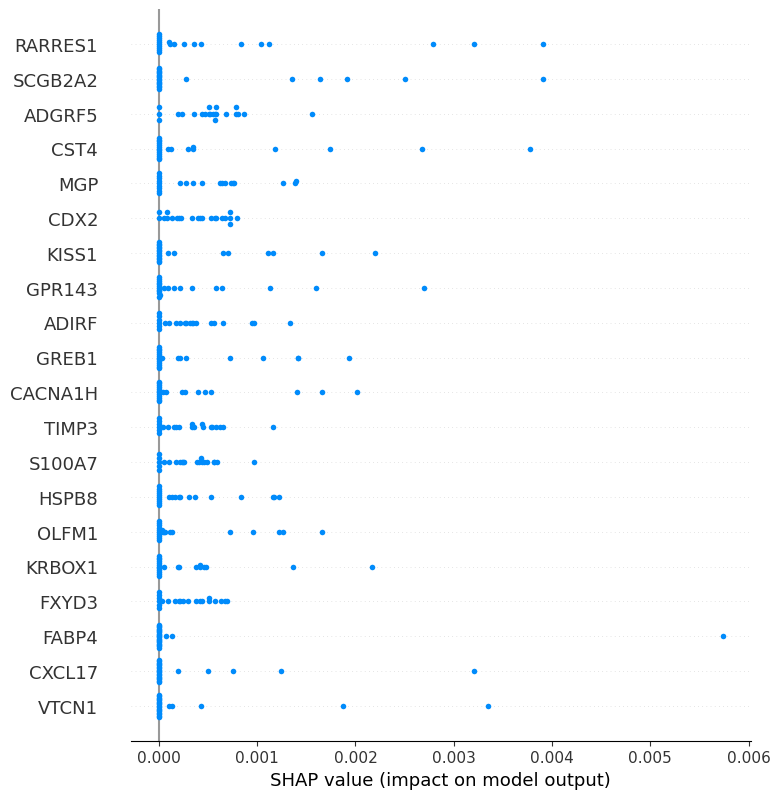

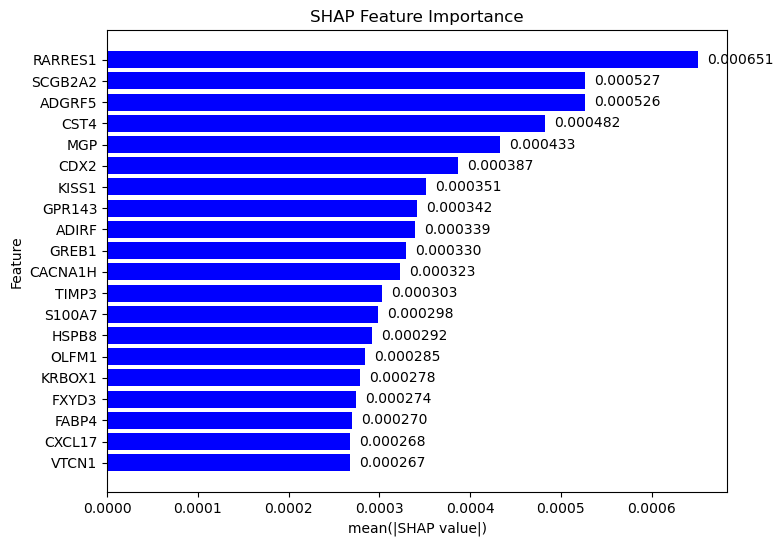

In [2]:
N = 20
mean_abs_shap = np.abs(shap_values).mean(axis=0)

top_indices = np.argsort(mean_abs_shap)[-N:]  

filtered_shap_values = shap_values[:, top_indices]
filtered_feature_names = [feature_names[i] for i in top_indices]

# Create a new SHAP Explanation object
filtered_explainer = shap.Explanation(filtered_shap_values, feature_names=filtered_feature_names)

# Plot the beeswarm and bar plots
shap.plots.beeswarm(filtered_explainer.abs, max_display=20)

plt.figure(figsize=(8, 6))
shap_order = np.argsort(mean_abs_shap)[-20:]  # Select top 10 features
plt.barh(np.array(feature_names)[shap_order], mean_abs_shap[shap_order], color="blue")

# Manually set labels with higher precision
for i, v in enumerate(mean_abs_shap[shap_order]):
    plt.text(v + 0.00001, i, f"{v:.6f}", color="black", va="center")  # Adjust precision here

plt.xlabel("mean(|SHAP value|)")
plt.ylabel("Feature")
plt.title("SHAP Feature Importance")
plt.show()


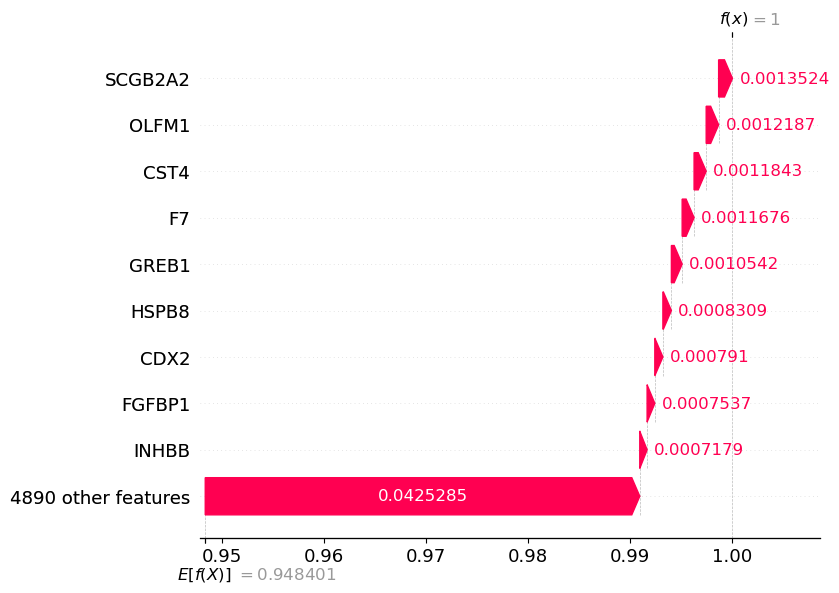

In [3]:
index_to_explain = 0 
row = df.iloc[index_to_explain]


base_value = row["Base Value"]
shap_values = row[1:-1].values  
feature_names = df.columns[1:-1] 

explanation = shap.Explanation(values=shap_values, base_values=base_value, feature_names=feature_names)

# shap.waterfall_plot(explanation)
shap.plots.waterfall(explanation)


ACH-000849


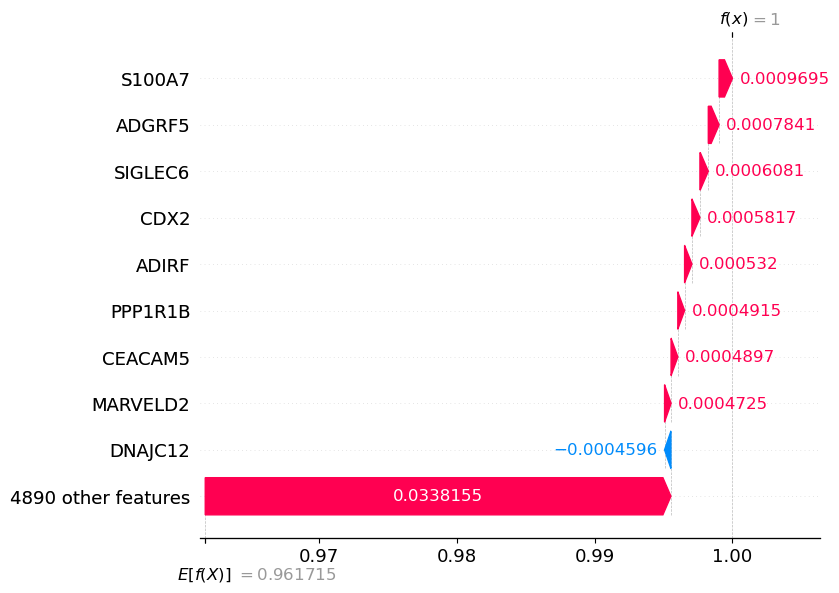

In [4]:
index_to_explain = 2
row = df.iloc[index_to_explain]


base_value = row["Base Value"]
shap_values = row[1:-1].values  
feature_names = df.columns[1:-1] 

explanation = shap.Explanation(values=shap_values, base_values=base_value, feature_names=feature_names)

print(row[0])
shap.waterfall_plot(explanation)